# Multi-armed bandits with annealing epsilon

The idea of this notebook is to implement a simple testbed to run a multiarmed bandits solution based on a sample average technique

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
%matplotlib inline

In [56]:
class TestBed:
    def __init__(self, n_actions, scale):
        self.n_actions = n_actions
        self.actions_q_values = np.random.normal(size=n_actions, scale=scale)
        
    def get_reward(self, action):
        return(np.random.normal(self.actions_q_values[action]))
    
    def get_optimal_reward(self):
        return(np.max(self.actions_q_values))
    
    def get_optimal_action(self):
        return(np.argmax(self.actions_q_values))
        

In [194]:
env = TestBed(1000, scale=0.75)
print("Optimal action value achievable: {}\nOptimal action: {}"
      .format(env.get_optimal_reward(), env.get_optimal_action()))

Optimal action value achievable: 1.9509051690227128
Optimal action: 599


In [191]:
n = np.ones(env.n_actions)
q = np.zeros(env.n_actions)
rewards = [0]
q_error = [np.mean(np.abs(q-env.actions_q_values))]
actions = [1/env.n_actions]
epsilons = []
lamb = 1-1/100000
epsilon =0.5

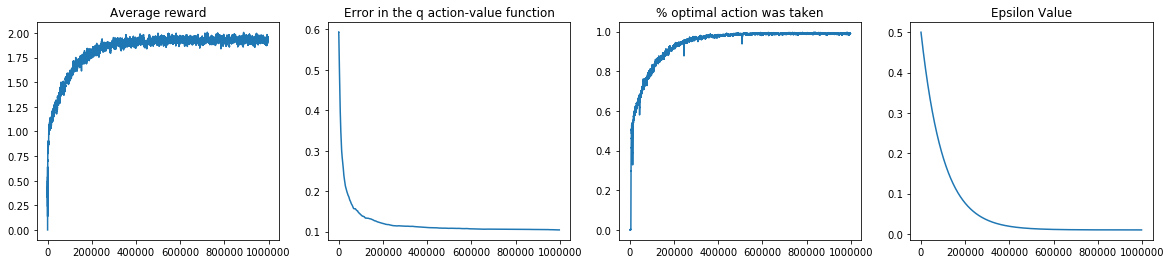

In [192]:
for episode in range(1000000):
    epsilon = epsilon * lamb +  0.01 * (1-lamb) # Epsilon exponential decaying
    rand_epsilon = random.random()
    if rand_epsilon > epsilon:
        # Greedy
        action = np.argmax(q)
        reward = env.get_reward(action)
    else:
        # Random
        action = random.randint(0, env.n_actions-1)
        reward = env.get_reward(action)
    n[action] = n[action] + 1
    q[action] = q[action] + (1.0/n[action])*(reward-q[action])
    epsilons.append(epsilon)
    actions.append(action)
    rewards.append(reward)
    q_error.append(np.mean(np.abs(q-env.actions_q_values)))
    if episode % 2000==0:
        clear_output(True)
        plt.figure(figsize=(20,4))
        plt.subplot(141)
        plt.plot(pd.Series(rewards).ewm(span=2000).mean())
        plt.title("Average reward")
        plt.subplot(142)
        plt.plot(pd.Series(q_error).ewm(span=2000).mean())
        plt.title("Error in the q action-value function")
        plt.subplot(143)
        plt.plot(pd.Series(actions==env.get_optimal_action()).ewm(span=2000).mean())
        plt.title("% optimal action was taken")
        plt.subplot(144)
        plt.plot(pd.Series(epsilons))
        plt.title("Epsilon Value")

        plt.show()